In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()  #No null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


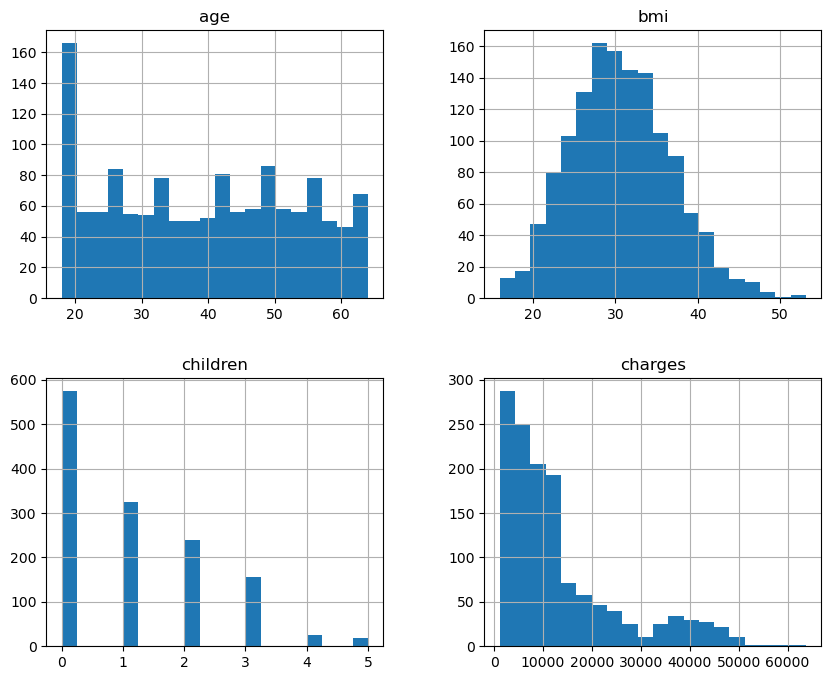

In [10]:
df.hist(bins=20, figsize=(10,8))
plt.show()

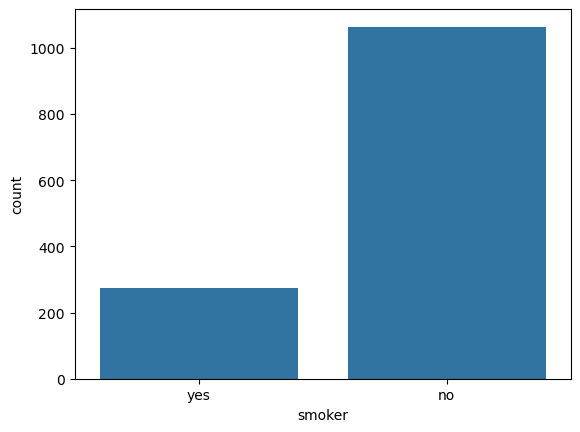

In [11]:
sns.countplot(x='smoker', data=df)
plt.show()

## Data Cleaning and Preparation

In [13]:
# If missing values exist
df = df.dropna()  # Or consider imputing values if needed

In [16]:
# make sure all region names have consistent casing
df['region'] = df['region'].str.lower()

In [17]:
# Encode categorical columns
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [19]:
# one-hot encoding for region column
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [20]:
df.head(2)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.90,0,1,16884.9240,False,False,True
1,18,0,33.77,1,0,1725.5523,False,True,False


## Checking for Outliers

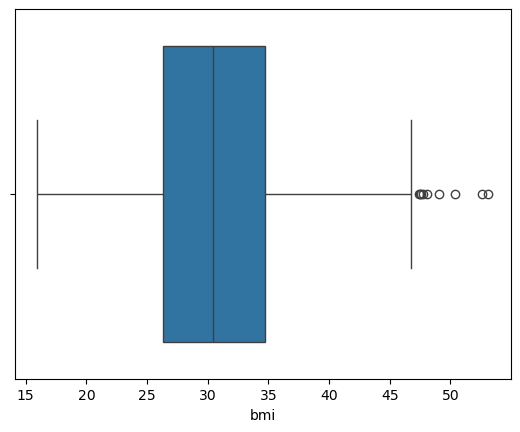

In [21]:
sns.boxplot(x=df['bmi'])
plt.show()

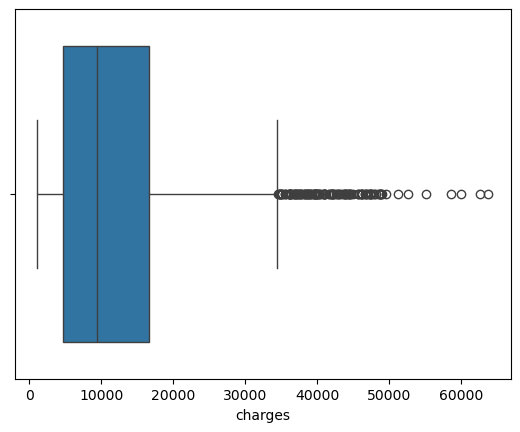

In [22]:
sns.boxplot(x=df['charges'])
plt.show()

## Feature Engineering

In [24]:
# BMI Grouping: categories: Underweight, Healthy, Overweight, Obese
bins = [0, 18.5, 24.9, 29.9, df['bmi'].max()]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']
df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels)

In [26]:
df = pd.get_dummies(df, columns=['bmi_group'], drop_first=True)

In [29]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_group_Healthy,bmi_group_Overweight,bmi_group_Obese,is_senior
0,19,1,27.900,0,1,16884.92400,False,False,True,False,True,False,0
1,18,0,33.770,1,0,1725.55230,False,True,False,False,False,True,0
2,28,0,33.000,3,0,4449.46200,False,True,False,False,False,True,0
3,33,0,22.705,0,0,21984.47061,True,False,False,True,False,False,0
4,32,0,28.880,0,0,3866.85520,True,False,False,False,True,False,0


In [28]:
#Adding a new feature that distinguishes seniors (age ≥ 60) from others
df['is_senior']=(df['age']>=60).astype(int)

In [31]:
# Interaction Feature: Smoker × BMI
df['smoker_bmi_interaction'] = df['smoker'] * df['bmi']

In [32]:
corr_matrix = df.corr()
print(corr_matrix['charges'].sort_values(ascending=False))

charges                   1.000000
smoker_bmi_interaction    0.845120
smoker                    0.787251
age                       0.299008
is_senior                 0.201118
bmi                       0.198341
bmi_group_Obese           0.196857
region_southeast          0.073982
children                  0.067998
region_northwest         -0.039905
region_southwest         -0.043210
sex                      -0.057292
bmi_group_Healthy        -0.105291
bmi_group_Overweight     -0.117768
Name: charges, dtype: float64


In [33]:
# separate feature and target
X=df.drop('charges',axis=1)
y=df.charges

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [35]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 13)
X_test shape: (268, 13)
y_train shape: (1070,)
y_test shape: (268,)


In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred = rf.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 2680.6591514951865
RMSE: 4954.234849690998
R² Score: 0.8096680764907758


In [40]:
param_dist = {
    'n_estimators': [100, 200],           # Number of trees
    'max_features': ['auto', 'sqrt'],                    # Features considered at each split
    'max_depth': [10, 20, 30, 40, None],                 # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],                     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                       # Minimum samples required at each leaf node
    'bootstrap': [True, False]                           # Whether bootstrap samples are used when building trees
}

In [41]:
rf1 = RandomForestRegressor(random_state=42)

In [43]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf1,
    param_distributions=param_dist,
    n_iter=10,                 # Number of parameter settings sampled
    scoring='r2',              # Evaluation metric (R² score)
    cv=3,                     # 5-fold cross-validation
    verbose=2,                 # Print progress
    random_state=42,
    n_jobs=-1                 # Use all available CPU cores
)

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\s

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2', verbose=2)

In [45]:
print("Best parameters found:", random_search.best_params_)

Best parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [46]:
print("Best cross-validation R² score:", random_search.best_score_)

Best cross-validation R² score: 0.8577216021092159


In [50]:
best_rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    bootstrap=True,
    random_state=42  # Optional, for reproducibility
)

In [51]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=5,
                      n_estimators=200, random_state=42)

In [59]:
y_pred1 = best_rf.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred1)
#rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred1)

print(f"MAE: {mae:.2f}")
#print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 2599.24
R²: 0.8262


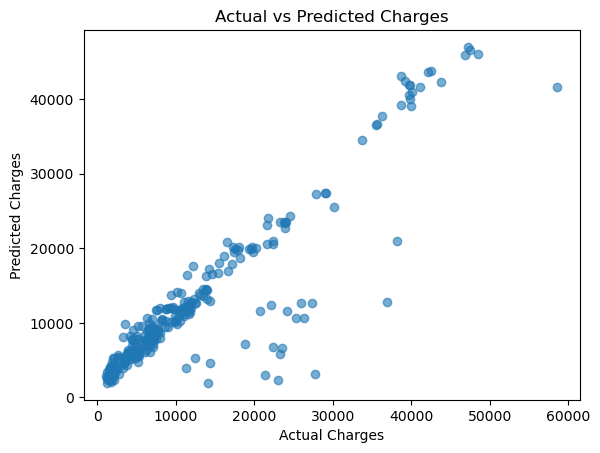

In [64]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred1, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

In [65]:
results_df = X_test.copy()
results_df['actual_charges'] = y_test
results_df['predicted_charges'] = y_pred1
results_df.to_csv('insurance_predictions.csv', index=False)

In [67]:
df.shape

(1338, 14)

In [68]:
df['predicted_charges'] = best_rf.predict(df.drop('charges', axis=1))
df['actual_charges'] = df['charges']
df.to_csv('insurance_predictions_all.csv', index=False)
